In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 3


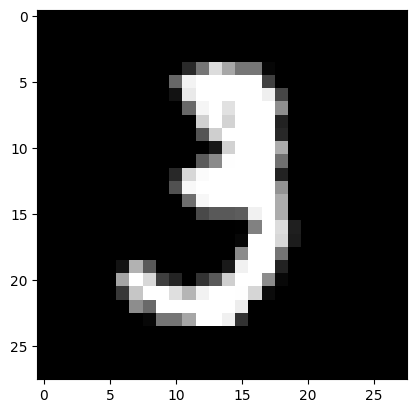

In [9]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [10]:
import torchvision.transforms as transforms

In [14]:
dataset = MNIST(root='data/', train=True, transform=transforms.ToTensor())

image_tensor, label = dataset[0]
print(image_tensor.shape, label)
image_tensor[:,10:15, 10:15]

torch.Size([1, 28, 28]) 5


tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])

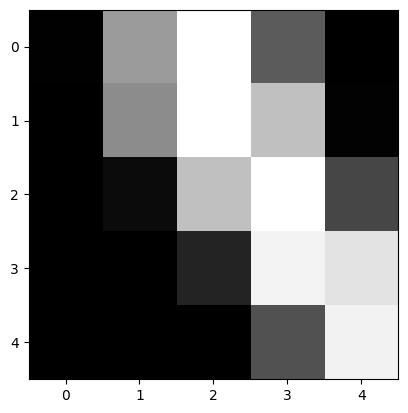

In [16]:
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');

In [19]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [20]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [22]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [25]:
print(model.weight.shape)
print(model.weight)

print(model.bias.shape)
model.bias

torch.Size([10, 784])
Parameter containing:
tensor([[ 0.0321,  0.0311, -0.0146,  ..., -0.0199, -0.0104, -0.0099],
        [-0.0269,  0.0297,  0.0305,  ..., -0.0351,  0.0083, -0.0202],
        [-0.0331,  0.0069, -0.0343,  ...,  0.0006, -0.0341,  0.0172],
        ...,
        [-0.0034,  0.0284,  0.0204,  ...,  0.0075, -0.0347,  0.0147],
        [-0.0272,  0.0234, -0.0348,  ...,  0.0213, -0.0038, -0.0063],
        [ 0.0135, -0.0275, -0.0198,  ...,  0.0071,  0.0245,  0.0220]],
       requires_grad=True)
torch.Size([10])


Parameter containing:
tensor([-0.0244,  0.0184,  0.0181, -0.0243,  0.0113, -0.0234, -0.0023, -0.0042,
        -0.0187,  0.0193], requires_grad=True)

In [26]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break;

tensor([2, 1, 7, 0, 5, 1, 6, 0, 3, 3, 9, 2, 6, 9, 2, 2, 0, 8, 0, 3, 2, 4, 6, 9,
        5, 4, 2, 0, 5, 3, 7, 2, 2, 0, 2, 1, 3, 2, 7, 7, 2, 7, 4, 6, 4, 1, 8, 2,
        6, 6, 1, 3, 3, 6, 0, 1, 0, 3, 8, 9, 2, 1, 9, 8, 5, 0, 1, 0, 4, 7, 7, 2,
        4, 1, 6, 9, 0, 7, 8, 7, 8, 6, 0, 9, 7, 5, 8, 1, 1, 4, 7, 4, 4, 4, 1, 4,
        6, 9, 1, 4, 6, 6, 1, 8, 4, 7, 1, 2, 7, 8, 8, 1, 2, 0, 4, 3, 9, 6, 8, 6,
        2, 8, 3, 2, 6, 6, 7, 7])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [27]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [30]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0214, -0.0054,  0.0059,  ..., -0.0153, -0.0311, -0.0240],
         [-0.0147, -0.0293,  0.0068,  ..., -0.0137,  0.0165, -0.0233],
         [ 0.0249, -0.0150, -0.0230,  ..., -0.0209,  0.0332, -0.0217],
         ...,
         [-0.0259,  0.0005, -0.0238,  ...,  0.0259, -0.0263,  0.0192],
         [-0.0112, -0.0350, -0.0110,  ...,  0.0345,  0.0241, -0.0170],
         [-0.0132, -0.0222, -0.0121,  ...,  0.0226,  0.0126,  0.0045]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0105, -0.0325,  0.0122,  0.0168, -0.0127,  0.0157,  0.0112,  0.0110,
         -0.0321, -0.0330], requires_grad=True)]

In [31]:
for images, labels in train_loader:
    print('images.shape: ', images.shape)
    outputs = model(images)
    break;

print('outputs.shape: ', outputs.shape)
print('Sample outputs: ', outputs[:2].data)

images.shape:  torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
Sample outputs:  tensor([[-0.1266, -0.0201,  0.2065, -0.2265, -0.3293,  0.0868, -0.2472, -0.0500,
          0.2609, -0.3548],
        [ 0.1331,  0.1236, -0.0483, -0.0363, -0.1612,  0.2361, -0.3158, -0.0208,
          0.1153,  0.0342]])


In [35]:
#softmax
print(outputs[0])
exps = torch.exp(outputs[0])
print(exps)
probs = exps / torch.sum(exps)
print(probs)
print(torch.sum(probs))

tensor([-0.1266, -0.0201,  0.2065, -0.2265, -0.3293,  0.0868, -0.2472, -0.0500,
         0.2609, -0.3548], grad_fn=<SelectBackward0>)
tensor([0.8811, 0.9801, 1.2294, 0.7974, 0.7194, 1.0907, 0.7810, 0.9513, 1.2981,
        0.7013], grad_fn=<ExpBackward0>)
tensor([0.0934, 0.1039, 0.1304, 0.0846, 0.0763, 0.1157, 0.0828, 0.1009, 0.1377,
        0.0744], grad_fn=<DivBackward0>)
tensor(1., grad_fn=<SumBackward0>)


In [42]:
import torch.nn.functional as F
probs = F.softmax(outputs, dim=1)
torch.sum(probs[0].data).item()

1.0000001192092896

In [44]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([8, 5, 2, 7, 2, 3, 3, 8, 5, 2, 6, 8, 2, 2, 2, 8, 2, 8, 1, 1, 7, 0, 0, 7,
        8, 3, 5, 2, 0, 0, 2, 2, 2, 5, 2, 2, 2, 2, 8, 3, 2, 8, 4, 2, 8, 6, 2, 2,
        2, 8, 5, 7, 2, 5, 2, 8, 0, 8, 1, 0, 2, 8, 2, 5, 2, 7, 5, 0, 2, 5, 5, 5,
        2, 2, 5, 2, 2, 8, 8, 2, 8, 2, 8, 2, 2, 8, 5, 8, 2, 5, 2, 7, 5, 6, 8, 8,
        2, 1, 0, 8, 7, 5, 2, 2, 2, 5, 2, 8, 0, 3, 7, 1, 5, 2, 8, 3, 3, 2, 2, 2,
        5, 8, 7, 3, 2, 3, 8, 3])
tensor([0.1377, 0.1245, 0.1226, 0.1222, 0.1159, 0.1254, 0.1179, 0.1134, 0.1310,
        0.1454, 0.1231, 0.1159, 0.1138, 0.1149, 0.1242, 0.1382, 0.1241, 0.1266,
        0.1191, 0.1361, 0.1159, 0.1330, 0.1235, 0.1263, 0.1463, 0.1197, 0.1229,
        0.1274, 0.1310, 0.1406, 0.1356, 0.1369, 0.1187, 0.1181, 0.1389, 0.1257,
        0.1364, 0.1177, 0.1177, 0.1277, 0.1148, 0.1361, 0.1155, 0.1260, 0.1156,
        0.1212, 0.1425, 0.1510, 0.1301, 0.1221, 0.1199, 0.1296, 0.1591, 0.1366,
        0.1907, 0.1209, 0.1307, 0.1393, 0.1397, 0.1440, 0.1951, 0.1328, 0.1447,
       

In [45]:
labels

tensor([6, 1, 6, 2, 4, 0, 3, 3, 3, 8, 6, 6, 4, 4, 9, 3, 9, 7, 8, 4, 5, 3, 2, 5,
        6, 2, 1, 2, 3, 0, 6, 3, 2, 1, 0, 2, 6, 1, 7, 7, 8, 0, 5, 5, 8, 8, 7, 9,
        5, 0, 1, 9, 4, 1, 8, 9, 3, 1, 8, 0, 5, 9, 8, 1, 3, 8, 1, 6, 2, 6, 2, 1,
        3, 3, 1, 9, 1, 9, 2, 4, 9, 6, 6, 9, 3, 8, 1, 9, 8, 3, 9, 8, 2, 8, 8, 6,
        4, 8, 0, 2, 7, 1, 6, 1, 0, 8, 6, 5, 7, 1, 7, 8, 3, 4, 3, 9, 1, 7, 2, 7,
        1, 2, 7, 1, 1, 1, 1, 1])

In [46]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [48]:
accuracy(outputs, labels)

tensor(0.1250)

In [49]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2839, grad_fn=<NllLossBackward0>)


In [50]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss': loss, 'val_acc': acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [51]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [52]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [53]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3137121200561523, 'val_acc': 0.08910205960273743}

In [54]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9429, val_acc: 0.6107
Epoch [1], val_loss: 1.6739, val_acc: 0.7214
Epoch [2], val_loss: 1.4730, val_acc: 0.7599
Epoch [3], val_loss: 1.3212, val_acc: 0.7809
Epoch [4], val_loss: 1.2045, val_acc: 0.7965


In [55]:
history2 = fit(5, 0.003, model, train_loader, val_loader)

Epoch [0], val_loss: 0.9791, val_acc: 0.8236
Epoch [1], val_loss: 0.8500, val_acc: 0.8354
Epoch [2], val_loss: 0.7667, val_acc: 0.8436
Epoch [3], val_loss: 0.7078, val_acc: 0.8495
Epoch [4], val_loss: 0.6640, val_acc: 0.8539
